<h1 style='color: skyblue;'>Team Bit by Bit Regression</h1>

<h2 style='color: orange;'>Imputing Missing Numerical Values using Mean and Categorical Values using Mode</h2>

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('ML101_train_dataset.csv')

df.drop(['LifeStyle'],axis=1,inplace=True)

numeric_cols = df.select_dtypes(include=['float','int32']).columns
print(numeric_cols)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_category = df[col].mode()[0]
    df[col].fillna(mode_category, inplace=True)
df

Index(['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP'],
      dtype='object')


,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Gender,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP
0,15725.0,6.518042,1714.0,56.0,Male,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416
1,6733.0,9.176300,2508.0,69.0,Female,176.826592,54.635484,191.698148,NaN,198.729261,-103.634282
2,7424.0,4.856772,1366.0,46.0,Male,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911
3,11853.0,9.727244,2189.0,32.0,Female,NaN,59.397202,205.440351,121.982302,204.527361,99.791603
4,7521.0,6.433183,2342.0,NaN,Male,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932
...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.0,NaN,2030.0,53.0,Male,182.202253,65.035350,212.133380,115.360556,348.653753,NaN
99996,10959.0,9.661165,2233.0,22.0,Male,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461
99997,NaN,7.378317,2080.0,37.0,Male,NaN,41.227254,224.300704,121.369845,195.905161,-107.061245
99998,12110.0,9.843323,1434.0,72.0,Female,155.025779,106.908491,140.865132,94.524506,149.675364,200.964967


In [7]:
df.isnull().mean()*100

Average Daily Steps    10.0
Hours of Sleep         10.0
Caloric Intake         10.0
Age                    10.0
Gender                  0.0
Height                 10.0
Weight                 10.0
Cholesterol level      10.0
Blood Sugar level      10.0
Systolic BP            10.0
Diastolic BP           10.0
dtype: float64

# Drop rows with more than 9 na values

In [8]:
df.dropna(thresh=9,inplace=True)
df.isnull().mean()*100

Average Daily Steps    8.329212
Hours of Sleep         8.345338
Caloric Intake         8.335663
Age                    8.399088
Gender                 0.000000
Height                 8.333513
Weight                 8.373288
Cholesterol level      8.315237
Blood Sugar level      8.290512
Systolic BP            8.390488
Diastolic BP           8.388338
dtype: float64

# Remove NA values from target column

In [11]:
df.dropna(subset=['Systolic BP','Diastolic BP'],inplace=True)
df.isnull().mean()*100

Average Daily Steps    8.803165
Hours of Sleep         8.840418
Caloric Intake         8.890516
Age                    8.947037
Gender                 0.000000
Height                 8.889231
Weight                 8.867394
Cholesterol level      8.810873
Blood Sugar level      8.762059
Systolic BP            0.000000
Diastolic BP           0.000000
dtype: float64

In [317]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

<h2 style='color: orange;'>Performing OneHotEncoding on Gender column using Pandas</h2>

In [12]:
mode_value = df['Gender'].mode()[0]
df['Gender'].fillna(mode_value, inplace=True)

df = pd.get_dummies(df,columns=['Gender'])
df['Gender_Female'] = df['Gender_Female'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [13]:
df

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,Gender_Female,Gender_Male
0,15725.0,6.518042,1714.0,56.0,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,0,1
1,6733.0,9.176300,2508.0,69.0,176.826592,54.635484,191.698148,NaN,198.729261,-103.634282,1,0
2,7424.0,4.856772,1366.0,46.0,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,0,1
3,11853.0,9.727244,2189.0,32.0,NaN,59.397202,205.440351,121.982302,204.527361,99.791603,1,0
4,7521.0,6.433183,2342.0,NaN,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,2701.0,NaN,2376.0,41.0,160.398936,90.530513,189.141981,99.684418,194.684105,234.620907,0,1
99996,10959.0,9.661165,2233.0,22.0,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,0,1
99997,NaN,7.378317,2080.0,37.0,NaN,41.227254,224.300704,121.369845,195.905161,-107.061245,0,1
99998,12110.0,9.843323,1434.0,72.0,155.025779,106.908491,140.865132,94.524506,149.675364,200.964967,1,0


In [16]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
df = imp.fit_transform(df)

In [22]:
df = pd.DataFrame(df,columns=['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP','Gender_Female','Gender_Male'])

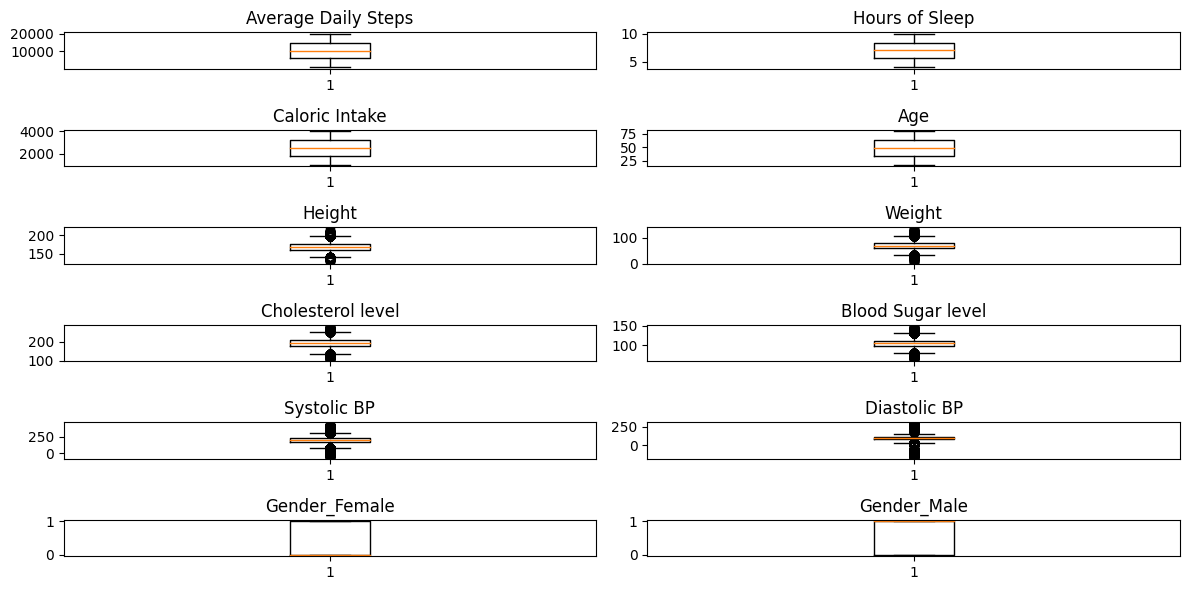

In [27]:
import matplotlib.pyplot as plt

num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2 

fig = plt.figure(figsize=(12, 6))  

for idx, col in enumerate(df.columns):
    row = idx // 2
    col_num = idx % 2

    ax = plt.subplot2grid((num_rows, 2), (row, col_num))
    ax.boxplot(df[col])
    ax.set_title(col)

for i in range(num_columns, num_rows * 2):
    fig.delaxes(plt.subplot2grid((num_rows, 2), (i // 2, i % 2)))

plt.tight_layout()
plt.show()


In [321]:
df.columns

Index(['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP', 'Gender_Female', 'Gender_Male'],
      dtype='object')

<h2 style='color: orange;'>Replaced Outliers with Lower Limit and Upper Limit</h2>

In [28]:
def fix_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
    
cols_fix = ['Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP']
for column in cols_fix:
    fix_outliers_iqr(df, column)

df


,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,Gender_Female,Gender_Male
0,15725.0,6.518042,1714.0,56.0,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,0.0,1.0
1,6733.0,9.176300,2508.0,69.0,176.826592,54.635484,191.698148,99.172405,198.729261,31.828559,1.0,0.0
2,7424.0,4.856772,1366.0,46.0,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,0.0,1.0
3,11853.0,9.727244,2189.0,32.0,164.979830,59.397202,205.440351,121.982302,204.527361,99.791603,1.0,0.0
4,7521.0,6.433183,2342.0,49.8,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
77842,2701.0,5.492765,2376.0,41.0,160.398936,90.530513,189.141981,99.684418,194.684105,156.387937,0.0,1.0
77843,10959.0,9.661165,2233.0,22.0,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,0.0,1.0
77844,11301.6,7.378317,2080.0,37.0,166.947224,41.227254,224.300704,121.369845,195.905161,31.828559,0.0,1.0
77845,12110.0,9.843323,1434.0,72.0,155.025779,106.908491,140.865132,94.524506,149.675364,156.387937,1.0,0.0


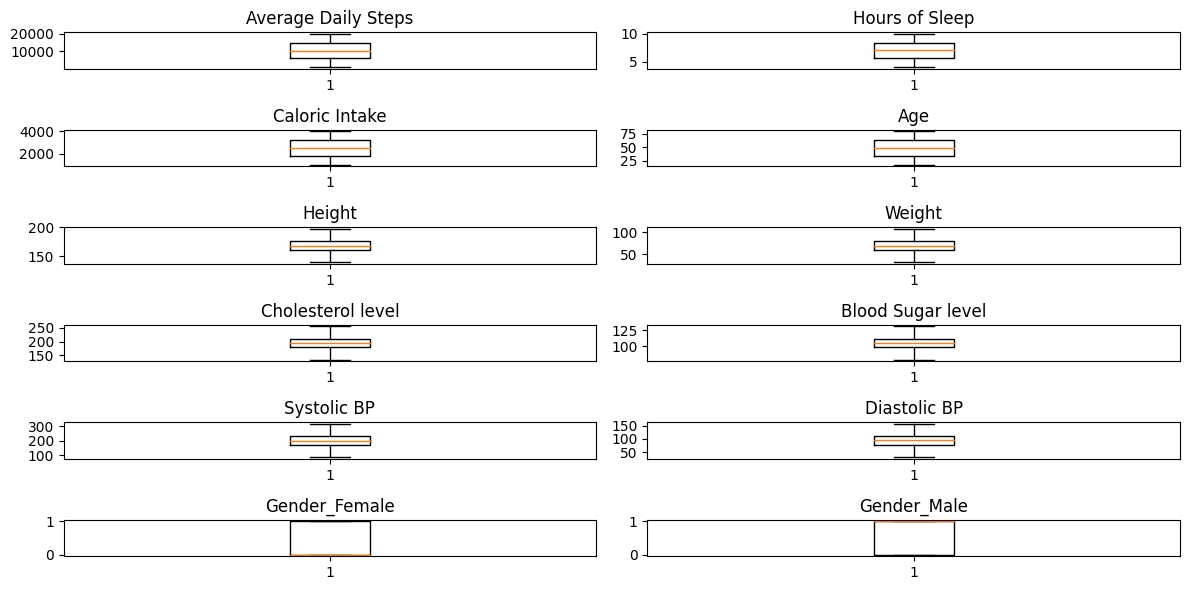

In [29]:
import matplotlib.pyplot as plt

num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2 

fig = plt.figure(figsize=(12, 6)) 

for idx, col in enumerate(df.columns):
    row = idx // 2
    col_num = idx % 2

    ax = plt.subplot2grid((num_rows, 2), (row, col_num))
    ax.boxplot(df[col])
    ax.set_title(col)

for i in range(num_columns, num_rows * 2):
    fig.delaxes(plt.subplot2grid((num_rows, 2), (i // 2, i % 2)))

plt.tight_layout()
plt.show()

## Also used inbuilt Linear Regression for comparing slope and intercept.

In [30]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr2 = LinearRegression()

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns=['Systolic BP','Diastolic BP'],axis=1),df['Systolic BP'],test_size=0.4)


In [33]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(df.drop(columns=['Systolic BP','Diastolic BP'],axis=1),df['Diastolic BP'],test_size=0.3,shuffle=True)

In [34]:
lr1.fit(xtrain,ytrain)
lr2.fit(xtrain1,ytrain1)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score
print(r2_score(ytest,lr1.predict(xtest)))


0.20027549553892743


In [36]:
r2_score(ytest1,lr2.predict(xtest1))

0.17236194632415391

<h2 style='color: orange;'>Now performing the final predictions on the Test Data.</h2>

In [37]:
test = pd.read_csv('ML101_dataset_test_feature.csv')
test = pd.get_dummies(test,columns=['Gender'])
test['Gender_Female'] = test['Gender_Female'].astype(int)
test['Gender_Male'] = test['Gender_Male'].astype(int)

In [39]:
ypred1 = lr1.predict(test)
ypred2 = lr2.predict(test)

<h2 style='color: orange;'>Exporting the Final Predictions to the CSV File </h2>

In [40]:
id = np.arange(0,test.shape[0])
data = {'ID':id,'Systolic BP': ypred1, 'Diastolic BP': ypred2}
df = pd.DataFrame(data)

csv_file_path = 'BitbyBit.csv'

df.to_csv(csv_file_path, index=False)